In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data related to direct marketing campaigns of a Portuguese banking institution.
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [2]:
# df=pd.read_csv('/content/drive/MyDrive/DL-Project/bank-full.csv')
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

In [3]:
df.shape

(45211, 17)

In [4]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
# Check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

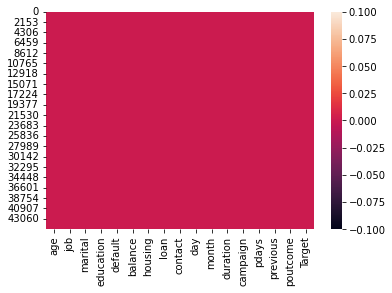

In [6]:
# Visualise null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
# Check data type
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
# check duplicates
df.duplicated().sum()

0

In [9]:
# Check how many categorical samples are there in column 'Target'
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

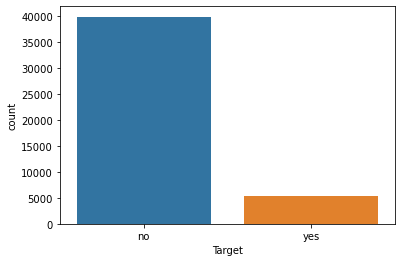

In [10]:
# Visualise count plot
sns.countplot(data=df,x='Target')
plt.show()

In [11]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [12]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [13]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [15]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [16]:
df_cat.dtypes

job          int64
marital      int64
education    int64
default      int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
Target       int64
dtype: object

In [17]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)

In [18]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [19]:
# Split dataset in input and output
X=df_new.drop('Target',axis=1)    # input
Y=df_new['Target']                # output

In [20]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [21]:
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [23]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
X_train

array([[-0.84143541, -0.51390555,  1.34758125, ...,  1.52140573,
         0.82078152,  0.44354185],
       [-0.65299489, -0.59018462,  1.34758125, ...,  1.52140573,
         0.15474035,  0.44354185],
       [-0.84143541, -0.3537195 ,  0.3854076 , ..., -0.71081695,
        -1.51036258,  0.44354185],
       ...,
       [ 0.66608873,  0.89376114,  0.62595101, ...,  1.52140573,
         0.82078152,  0.44354185],
       [ 0.38342795,  0.1284278 ,  0.50567931, ...,  1.52140573,
         0.15474035,  0.44354185],
       [ 0.38342795, -0.32733965,  0.14486419, ..., -0.71081695,
        -1.84338317, -1.58152759]])

In [25]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Report
This model is not accurate as the value of 0 is 98%.
#Clearly Data is imbalance #here, there are 2 classes : first class : 0 means Target says 'No #and second class : 1 means Target says 'Yes #here majority class : 0(39922 samples) and minority class : 0(5289 samples) #Here we have to balance of both classes #means here we have to use sampling technique for balance of 2 classes #There are 2 types of sampling technique :- #1. RandomOverSampling : in this sampling , converts minority class into #majority class #2. RandonUnderSampling : in this sampling , converts majority class into #minority class

# First install inbuilt package imblearn
#!pip install imblearn

In [26]:
#RandomOverSampler : inbuilt class : to increase means create duplicate 
#records of minority class which equal to majority class
from imblearn.over_sampling import RandomOverSampler

In [27]:
# Check how many samples of class 0,1 and 2 class in Y_train
Y_train.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

In [28]:
# Now apply RandomOverSampler class.
# Create an object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [29]:
# Use inbuilt method fit_resample() of RandomOverSampler class
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [30]:
# Check 
Y_train_ros.value_counts()

0    27909
1    27909
Name: Target, dtype: int64

In [31]:
# Now check how many samples of class 0,1 and 2 class in Y_test
Y_test.value_counts()

0    12013
1     1551
Name: Target, dtype: int64

In [32]:
# Now apply RandomOverSampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [33]:
# Again check
Y_test_ros.value_counts()

0    12013
1    12013
Name: Target, dtype: int64

In [34]:
# regression = linear
#classification = sigmoid
#more than 2 = softmax

In [35]:
# Create archetecture of neural network
import tensorflow as tf
# create the object of Sequential class
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=16,activation='relu',input_shape=(X.shape[1],)),
  tf.keras.layers.Dense(units=16,activation='relu'),
  tf.keras.layers.Dense(units=1,activation='sigmoid')
])

2022-07-29 12:58:18.529758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-29 12:58:18.529789: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-29 12:58:20.011136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 12:58:20.011170: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 12:58:20.011192: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Accuracy'])


In [38]:
# Early Stopping: is used to stop itration.
from tensorflow.keras.callbacks import EarlyStopping
# Callbacks : inbuilt parameter of fit()
# Create Callbacks:-
# EarlyStopping() inbuilt function.
cb=EarlyStopping(
    monitor='val_loss',   # val_loss means testing error
    min_delta=0.00001,   # value of Lambda
    patience=20,
    verbose=1,
    mode='auto',   # main loss
    baseline=None,
    restore_best_weights=False
)

In [39]:
# Train the model
'''
trained_model=model.fit(X_train,Y_train,epochs=4000,batch_size=5,callbacks=cb,
                        validation_split=0.2)
                        '''
# validation_split= 0.2 mean 20% data for validation from X_train,Y_train



X_train_ros,X_val_ros,Y_train_ros,Y_val_ros=train_test_split(X_train_ros,Y_train_ros,
                                             test_size=0.2,random_state=1)
trained_model=model.fit(X_train_ros,Y_train_ros,epochs=4000,callbacks=cb,
                        validation_data=(X_val_ros,Y_val_ros))

Epoch 1/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.4650 - Accuracy: 0.7868 - val_loss: 0.4082 - val_Accuracy: 0.8167
Epoch 2/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.4064 - Accuracy: 0.8214 - val_loss: 0.3945 - val_Accuracy: 0.8258
Epoch 3/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3962 - Accuracy: 0.8275 - val_loss: 0.3859 - val_Accuracy: 0.8306
Epoch 4/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3898 - Accuracy: 0.8289 - val_loss: 0.3862 - val_Accuracy: 0.8313
Epoch 5/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3855 - Accuracy: 0.8305 - val_loss: 0.3768 - val_Accuracy: 0.8329
Epoch 6/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3815 - Accuracy: 0.8332 - val_loss: 0.3761 - val_Accuracy: 0.8369
Epoch 7/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3776 - Accuracy: 0.8363 - val_loss: 0.3719 -

Epoch 57/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3376 - Accuracy: 0.8558 - val_loss: 0.3457 - val_Accuracy: 0.8529
Epoch 58/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3373 - Accuracy: 0.8563 - val_loss: 0.3439 - val_Accuracy: 0.8524
Epoch 59/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3370 - Accuracy: 0.8554 - val_loss: 0.3421 - val_Accuracy: 0.8511
Epoch 60/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3371 - Accuracy: 0.8570 - val_loss: 0.3426 - val_Accuracy: 0.8525
Epoch 61/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3368 - Accuracy: 0.8570 - val_loss: 0.3439 - val_Accuracy: 0.8533
Epoch 62/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3365 - Accuracy: 0.8574 - val_loss: 0.3425 - val_Accuracy: 0.8528
Epoch 63/4000
1396/1396 [==============================] - 2s 1ms/step - loss: 0.3363 - Accuracy: 0.8573 - val_loss: 0

In [40]:
# training loss and training score
model.evaluate(X_train_ros,Y_train_ros)

1396/1396 [==============================] - 1s 872us/step - loss: 0.3280 - Accuracy: 0.8602


[0.3279542326927185, 0.860214114189148]

In [41]:
# testing loss and testing score
model.evaluate(X_val_ros,Y_val_ros)

349/349 [==============================] - 0s 876us/step - loss: 0.3428 - Accuracy: 0.8540


[0.34279072284698486, 0.8539949655532837]

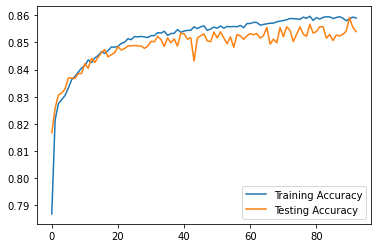

In [42]:
#visualisation the accuracy(training accuracy) and val_accuracy(testing accuracy)
plt.plot(trained_model.history['Accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_Accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

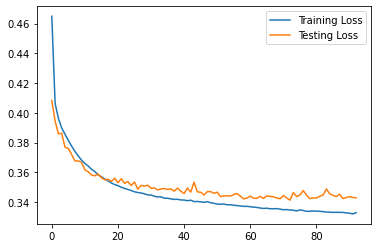

In [43]:
#visualisation the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

In [44]:
# test the model with 30% record 
Y_pred=model.predict(X_test_ros)
Y_pred

751/751 [==============================] - 1s 702us/step


array([[0.0081578 ],
       [0.01390041],
       [0.830708  ],
       ...,
       [0.7896618 ],
       [0.97251517],
       [0.7934146 ]], dtype=float32)

In [45]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12013
           1       0.83      0.83      0.83     12013

    accuracy                           0.83     24026
   macro avg       0.83      0.83      0.83     24026
weighted avg       0.83      0.83      0.83     24026

[[9922 2091]
 [2019 9994]]
